<a href="https://colab.research.google.com/github/AristiJara/Calibration_Cam/blob/main/Calibration_cam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Camera Calibration with OpenCV</h1>



#**Pinhole Camera Model and Lens Distortion in Computer Vision**

The pinhole camera model describes how 3D points in space are projected onto a 2D image plane using a perspective transformation. The equation:

$$ s \mathbf{m}' = A [R \mid t] \mathbf{M}'$$

$$
s \begin{bmatrix} u \\ v \\ 1 \end{bmatrix} =
\begin{bmatrix}
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
r_{11} & r_{12} & r_{13} & t_1  \\
r_{21} & r_{22} & r_{23} & t_2  \\
r_{31} & r_{32} & r_{33} & t_3
\end{bmatrix}
\begin{bmatrix}
X \\
Y \\
Z \\
1
\end{bmatrix}
$$


relates the 3D point (X, Y, Z) to its 2D projection (u, v) in the image, where the camera matrix (A) contains intrinsic parameters, and the rotation-translation matrix (R|t) represents extrinsic parameters. The intrinsic parameters include focal lengths (fx, fy) and the principal point (cx, cy), which are fixed for a given camera and remain the same even if the image resolution changes, although they might need to be scaled accordingly. The extrinsic parameters describe the camera’s position and orientation relative to the scene.

The following figure illustrates the pinhole camera model:
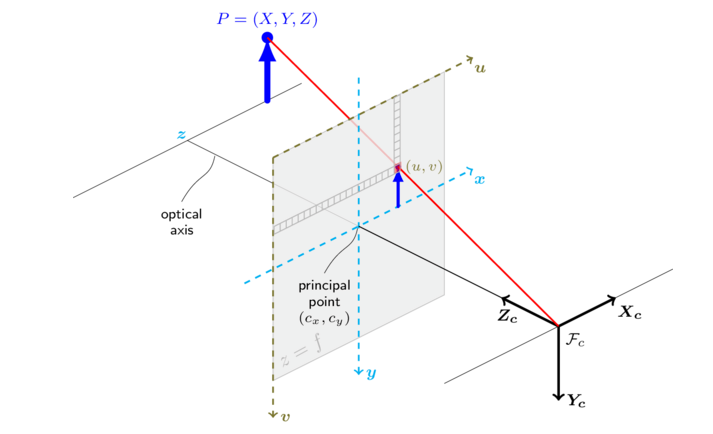

The model extends to account for lens distortions:

Radial distortion, modeled by coefficients k₁, k₂, k₃, etc., causes barrel distortion (k₁ > 0) or pincushion distortion (k₁ < 0).
Tangential distortion, described by coefficients p₁ and p₂, results from lens misalignment, causing image distortion.

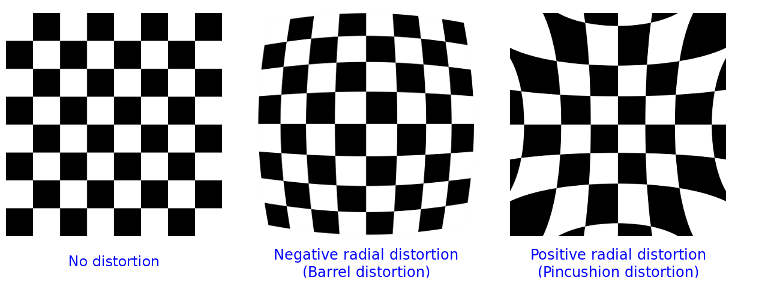

The distortion coefficients are part of the intrinsic camera parameters and remain constant regardless of image resolution.

#**Code**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt



**Termination Criteria:** This line sets the criteria for when to stop the corner detection algorithm for the chessboard. It combines two conditions:

  *   EPS: The required accuracy (0.001).
  *   MAX_ITER: The maximum number of iterations (30).

**Square Size:** This variable defines the size of each square on the chessboard in centimeters. This information is crucial for converting 2D image points into 3D world coordinates.


**Preparation of 3D Points:**

  *   chessboard_size: This tuple defines the number of internal corners on the chessboard (8x5).
  *   objp: A zero-initialized array that will hold the 3D coordinates of the chessboard corners.
  *   np.mgrid: This function generates a grid of points in the XY plane for the chessboard corners, with Z coordinates set to 0.
  *   The multiplication by square_size_cm / 100 converts the square sizes from centimeters to meters, which is the standard unit used in calibration.

**Storage for 3D and 2D Points:**

  *   objpoints: A list that will store the 3D coordinates of the chessboard corners in the world.
  *   imgpoints: A list that will store the 2D coordinates of the detected corners in the captured images.

In [ ]:
# Define termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Define the size of each square in cm
square_size_cm = 2.8  # Size of the square in cm

# Prepare the 3D points of the chessboard in the Z=0 plane
chessboard_size = (8, 5)  # Adjust to the internal corners of the board

objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
objp *= square_size_cm / 100  # Convert to meters

# Arrays to store 3D world points and 2D image points
objpoints = []  # 3D points in the world
imgpoints = []  # 2D points in the image

This part of the code is designed to process a series of calibration images, specifically searching for chessboard patterns to detect their corners. It begins by setting up the paths for the input images and the output directory where the images with detected corners will be saved.

One of the crucial operations is converting the color images to grayscale. This step is essential because many computer vision algorithms, including corner detection, operate more effectively on single-channel images. Grayscale images reduce complexity and computational load while retaining the necessary information to detect features such as edges and corners.

Once the images are converted to grayscale, the code attempts to find the corners of the chessboard using OpenCV's <code>findChessboardCorners</code> function. This function analyzes the grayscale image to identify the specific pattern of the chessboard and locate its internal corners. Accurate detection of these corners is fundamental for camera calibration, as it establishes a correspondence between 3D points in the real world and their 2D projections in the images. Precise corner detection ensures that the calibration process is accurate, which is crucial for improving the performance of computer vision applications.

If corners are found, the code refines their positions to subpixel accuracy, thereby enhancing the precision of the calibration. It then draws the detected corners on the original images for visualization, displaying only the first processed image for immediate feedback. Finally, it saves the modified images with the detected corners in the specified output folder.

Processing file: /content/drive/MyDrive/Cam/Camera2/Capture23_camera2.jpg


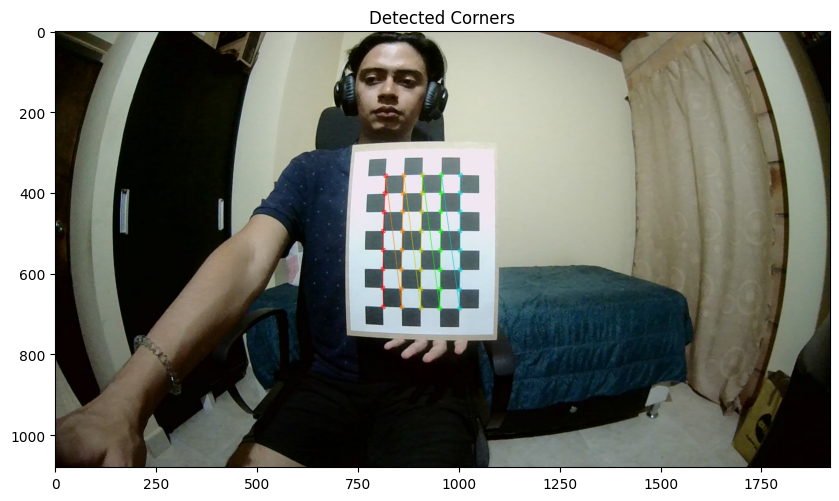

Image saved with corners at: /content/drive/MyDrive/Cam/Camera2_Corners/Capture23_camera2_corners.jpg
Processing file: /content/drive/MyDrive/Cam/Camera2/Capture25_camera2.jpg
Image saved with corners at: /content/drive/MyDrive/Cam/Camera2_Corners/Capture25_camera2_corners.jpg
Processing file: /content/drive/MyDrive/Cam/Camera2/Capture24_camera2.jpg
Image saved with corners at: /content/drive/MyDrive/Cam/Camera2_Corners/Capture24_camera2_corners.jpg
Processing file: /content/drive/MyDrive/Cam/Camera2/Capture22_camera2.jpg
Image saved with corners at: /content/drive/MyDrive/Cam/Camera2_Corners/Capture22_camera2_corners.jpg
Processing file: /content/drive/MyDrive/Cam/Camera2/Capture21_camera2.jpg
Image saved with corners at: /content/drive/MyDrive/Cam/Camera2_Corners/Capture21_camera2_corners.jpg
Processing file: /content/drive/MyDrive/Cam/Camera2/Capture20_camera2.jpg
Image saved with corners at: /content/drive/MyDrive/Cam/Camera2_Corners/Capture20_camera2_corners.jpg
Processing file: /

In [ ]:
# Path to calibration images
image_folder = '/content/drive/MyDrive/Cam/Camera2'
output_folder = '/content/drive/MyDrive/Cam/Camera2_Corners/'

images = glob.glob(os.path.join(image_folder, '*.jpg'))

# Create the destination folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Initialize a flag to control the display of the first image
first_image_shown = False

# Read all images to detect corners
for fname in images:
    print(f"Processing file: {fname}")  # Debug message
    img = cv.imread(fname)
    if img is None:
        print(f"Error loading image: {fname}")
        continue
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the corners of the chessboard
    ret, corners = cv.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)

        # Refine the corner locations
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # Draw the corners on the image
        img_with_corners = cv.drawChessboardCorners(img, chessboard_size, corners2, ret)

        # Show only the first image with detected corners
        if not first_image_shown:
            plt.figure(figsize=(10, 6))
            plt.imshow(cv.cvtColor(img_with_corners, cv.COLOR_BGR2RGB))
            plt.title('Detected Corners')
            plt.show()
            first_image_shown = True  # Update the flag to prevent further display

        # Generate a new name for the saved image
        base_name = os.path.basename(fname)
        name, ext = os.path.splitext(base_name)
        new_name = f"{name}_corners{ext}"
        save_path = os.path.join(output_folder, new_name)

        # Save the image with detected corners to the destination folder
        cv.imwrite(save_path, img_with_corners)
        print(f"Image saved with corners at: {save_path}")
    else:
        print(f"Chessboard corners not found in image: {fname}")

This part of the code calibrates a camera using the collected 3D points and their corresponding 2D points in the images:



**Verification of Points:** The code first checks if there are any 3D and 2D points collected. If both <code>objpoints</code> and <code>imgpoints</code> have entries, it proceeds with the calibration. This ensures that there is sufficient data for the calibration process.

**Camera Calibration:** The function <code>cv.calibrateCamera</code> is called to perform the calibration. This function uses the following parameters:

  * <code>objpoints</code>: The list of 3D points in the real world.
  * <code>imgpoints</code>: The corresponding 2D points in the images.
  * <code>gray.shape[::-1]</code>: This provides the size of the images in the format required by the function (width, height).
  * <code>None</code>: These are placeholders for the camera matrix and distortion coefficients, which will be computed by the function.

  The output of this function includes:

  * <code>ret</code>: A return value indicating the success of the calibration.
  * <code>camera_matrix</code>:  The intrinsic parameters of the camera, which include focal lengths and the principal point.
  * <code>dist_coeffs</code>:  The distortion coefficients that account for lens distortion.
  * <code>rvecs</code>  and <code>tvecs</code> : The rotation and translation vectors representing the camera’s position and orientation for each calibration image.

Then, the code prints the camera matrix and the distortion coefficients. Finally, the calibration parameters are saved to a file using <code>np.savez</code>.



In [ ]:
if len(objpoints) > 0 and len(imgpoints) > 0:
    print("\nCalibrating the camera...")

    # Camera calibration using the 3D points (objpoints) and the 2D points (imgpoints)
    ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    # Display the results
    print("Camera matrix:")
    print(camera_matrix)

    print("\nDistortion coefficients:")
    print(dist_coeffs)

    # Save the parameters to a file for later use
    np.savez('/content/drive/MyDrive/Cam/calibration_camera2.npz', camera_matrix=camera_matrix, dist_coeffs=dist_coeffs, rvecs=rvecs, tvecs=tvecs)


Calibrating the camera...
Camera matrix:
[[730.38995837   0.         947.94996807]
 [  0.         730.73558418 521.04521991]
 [  0.           0.           1.        ]]

Distortion coefficients:
[[-0.28367699  0.07340489  0.00053516  0.00030706 -0.00800771]]


Finally, this part of the code performs several key actions:



1. **Loading Calibration Parameters:** It uses <code>np.load()</code> to open the file containing the camera calibration parameters. The data is then accessed by their names, allowing retrieval of the camera matrix and distortion coefficients needed for correction.
2. **Correcting Image Distortion:** If the image loads successfully, distortion correction is applied using the <code>cv.undistort()</code> function. This function takes the original image, the camera matrix, and the distortion coefficients as arguments. The result is an undistorted image, which enhances visual quality and detail accuracy.

Lastly, the corrected image is displayed and saved.


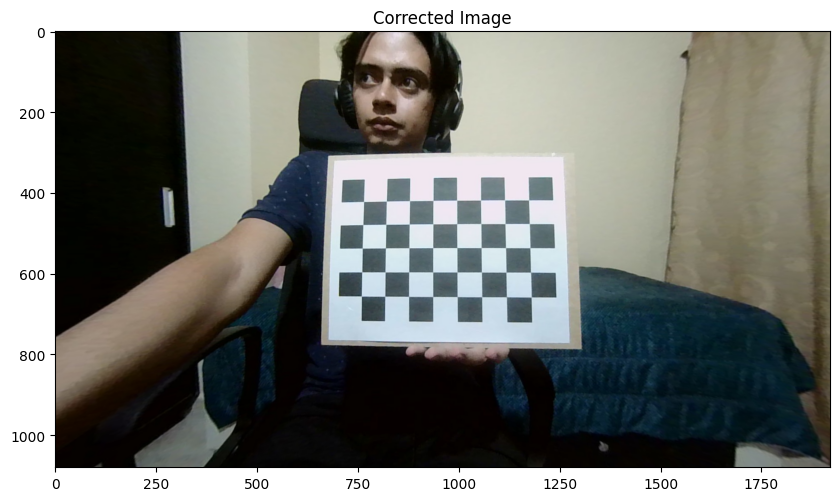

In [ ]:
# Load the camera matrix and distortion coefficients from a calibration file
data = np.load('/content/drive/MyDrive/Cam/calibration_camera2.npz')
camera_matrix = data['camera_matrix']
dist_coeffs = data['dist_coeffs']

# Path to the image you want to correct
image_path = '/content/drive/MyDrive/Cam/Camera2/Capture14_camera2.jpg'

# Load the image
img = cv.imread(image_path)
if img is None:
    print(f"Could not load the image at path: {image_path}")
else:
    # Apply distortion correction
    undistorted_img = cv.undistort(img, camera_matrix, dist_coeffs)

    # Display the corrected image
    plt.figure(figsize=(10, 6))
    plt.imshow(cv.cvtColor(undistorted_img, cv.COLOR_BGR2RGB))
    plt.title('Corrected Image')
    plt.show()

    # Save the corrected image if desired
    output_path = '/content/drive/MyDrive/Cam/camera2_Capture14_undistorted.jpg'
    cv.imwrite(output_path, undistorted_img)

In [ ]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], camera_matrix, dist_coeffs)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2) / len(imgpoints2)
    mean_error += error

print("Total error: ", mean_error / len(objpoints))

Total error:  0.16404635745709284


In [ ]:
# Load calibration data for Sensor 1
calibration_sensor1 = np.load('/content/drive/MyDrive/Cam/calibration_camera1.npz')
camera_matrix1 = calibration_sensor1['camera_matrix']
dist_coeffs1 = calibration_sensor1['dist_coeffs']

# Load calibration data for Sensor 2
calibration_sensor2 = np.load('/content/drive/MyDrive/Cam/calibration_camera2.npz')
camera_matrix2 = calibration_sensor2['camera_matrix']
dist_coeffs2 = calibration_sensor2['dist_coeffs']

# Print camera matrix and distortion coefficients
print("Calibration of Camera 1:")
print("Camera Matrix (camera_matrix):")
print(camera_matrix1)
print("\nDistortion Coefficients (dist_coeff):")
print(dist_coeffs1)

print("\nCalibration of Camera 2:")
print("Camera Matrix (camera_matrix):")
print(camera_matrix2)
print("\nDistortion Coefficients (dist_coeff):")
print(dist_coeffs2)

Calibration of Camera 1:
Camera Matrix (camera_matrix):
[[702.47759475   0.         943.49174087]
 [  0.         702.63862178 514.72629939]
 [  0.           0.           1.        ]]

Distortion Coefficients (dist_coeff):
[[-0.26216838  0.06252116  0.00074928  0.00062502 -0.0062837 ]]

Calibration of Camera 2:
Camera Matrix (camera_matrix):
[[730.38995837   0.         947.94996807]
 [  0.         730.73558418 521.04521991]
 [  0.           0.           1.        ]]

Distortion Coefficients (dist_coeff):
[[-0.28367699  0.07340489  0.00053516  0.00030706 -0.00800771]]


#**Referencias**
https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html

https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html